# Machine Learning Final Project Template

This is the template for the final project of the course.

Form groups of 3 people, take this template and add your code to it. Choose one of the team member's GitHub and upload it there, so that you can all collaborate.

## 1. Imports and Setup

In [3]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning (you will probably need to add more)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, mean_squared_error

## 2. Load the Data

We present to you two different datasets. One is for regression and the other for classification. **Chose only one of them**.

Here are their characteristics and their original documentation if you want to check it out:

#### **Bike Sharing Demand - Regression**

**Dataset's description**

*Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.*

*The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.*

*You are provided hourly rental data spanning two years. You must predict the total count of bikes rented during each hour*.

Original documentation: https://www.kaggle.com/competitions/bike-sharing-demand/

You should be able to download the .csv file from our GitHub:

In [6]:
bike_sharing_demand_df = pd.read_csv('bike-sharing-demand.csv')

#### **Wine quality - Classification**

**Dataset's description**

*Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests*.

*These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.*

*You are provided the physicochemical characteristics of the wine. You must predict the sensory perception (quality) of it (1 - 10).*

**It could be seen as a regression or a classification. We recommend to choose the other dataset if you want to perform regression, but you are welcome to attack this problem from a regression perspective too.**

Original documentation: https://archive.ics.uci.edu/dataset/186/wine+quality

In [9]:
!pip install ucimlrepo

In [11]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# Put them together in a single dataframe
wine_quality_df = pd.concat([X, y], axis=1)

Choose one of them.

Now:
- Divide your data in the training and test sets. Remember, the EDA is only done with the training set. Use a specific seed (so it is replicable each time you execute). Leave test set aside until the end of the project.
- Since we are going to do cross-validation, it is not necessary to divide the train set on validation and train.

In [157]:
# Your code goes here
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(wine_quality_df, test_size=0.2, random_state=42)

## 3. Exploratory Data Analysis

### 3.1. Initial exploration

- See the columns of your data
- View basic statistics
- Check for missing values
- Visualize distributions, relationships and correlations between attributes/columns.

In [102]:
wine_quality_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [104]:
wine_quality_df.info()
wine_quality_df.describe()
wine_quality_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

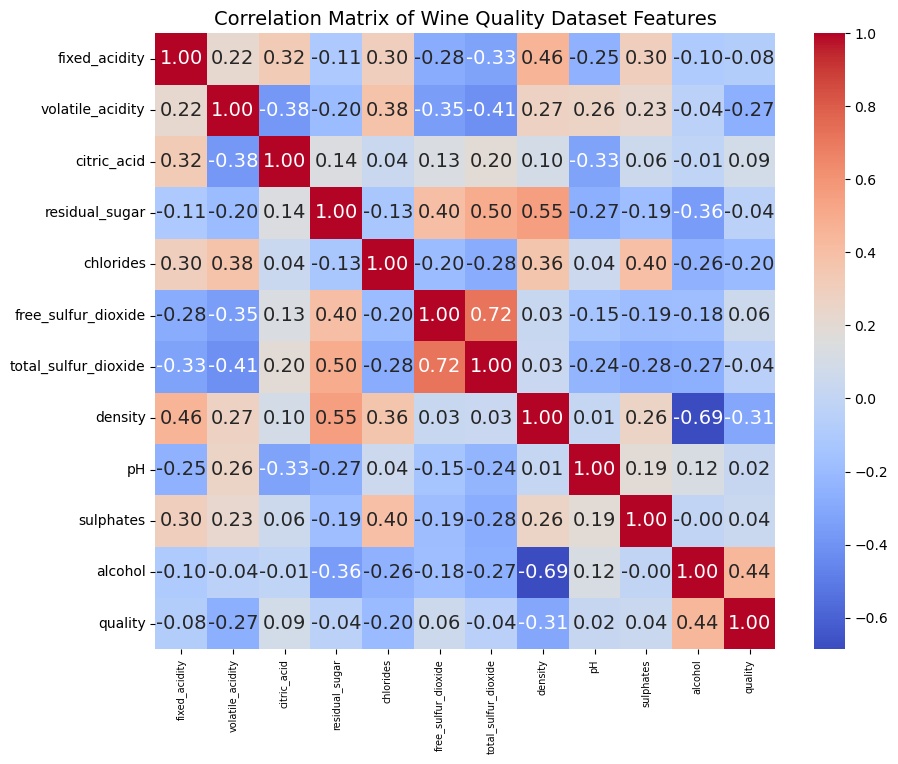

In [106]:
correlation_matrix = wine_quality_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Quality Dataset Features')
plt.show()

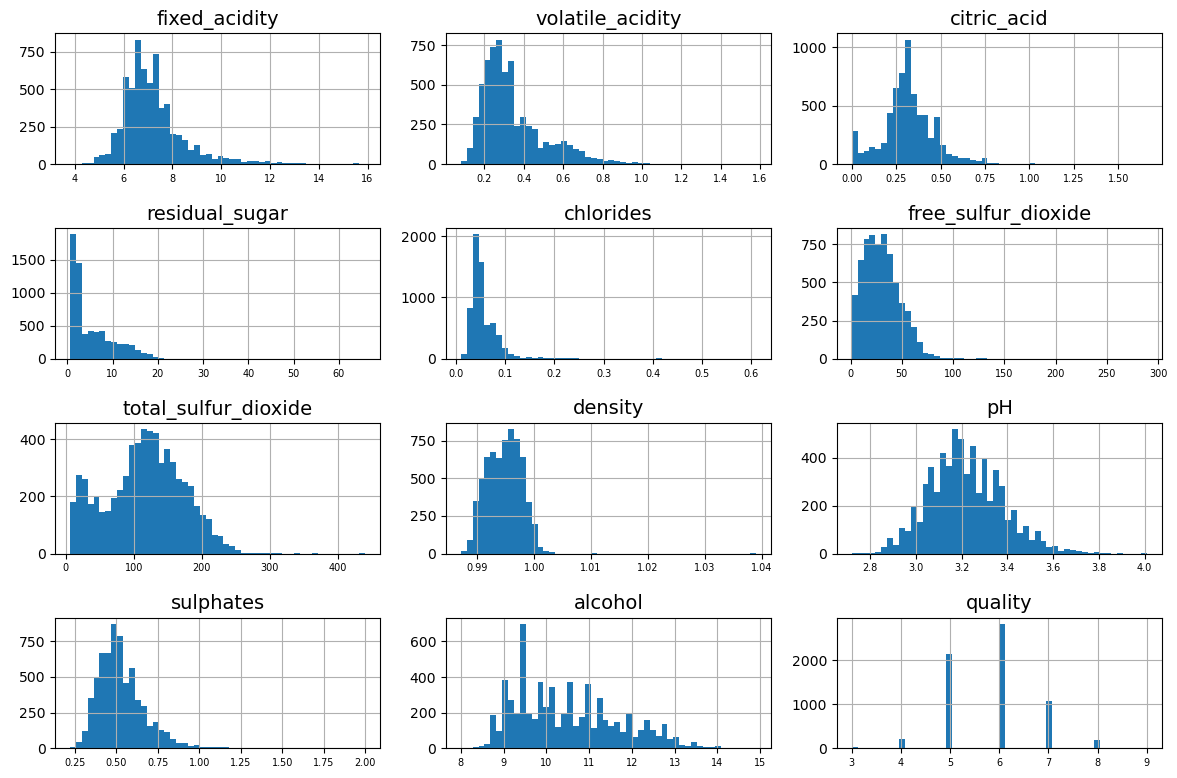

In [107]:
# Plot histograms
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=10)

wine_quality_df.hist(bins=50, figsize=(12, 8))

plt.tight_layout()
plt.show()

### 3.2. Data cleaning

- Handle missing values, duplicates, and outliers.

<class 'pandas.core.frame.DataFrame'>
Index: 5318 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5318 non-null   float64
 1   volatile_acidity      5318 non-null   float64
 2   citric_acid           5318 non-null   float64
 3   residual_sugar        5318 non-null   float64
 4   chlorides             5318 non-null   float64
 5   free_sulfur_dioxide   5318 non-null   float64
 6   total_sulfur_dioxide  5318 non-null   float64
 7   density               5318 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5318 non-null   float64
 10  alcohol               5318 non-null   float64
 11  quality               5318 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 540.1 KB

Missing values after replacing 0s in citric_acid:
0


<Axes: >

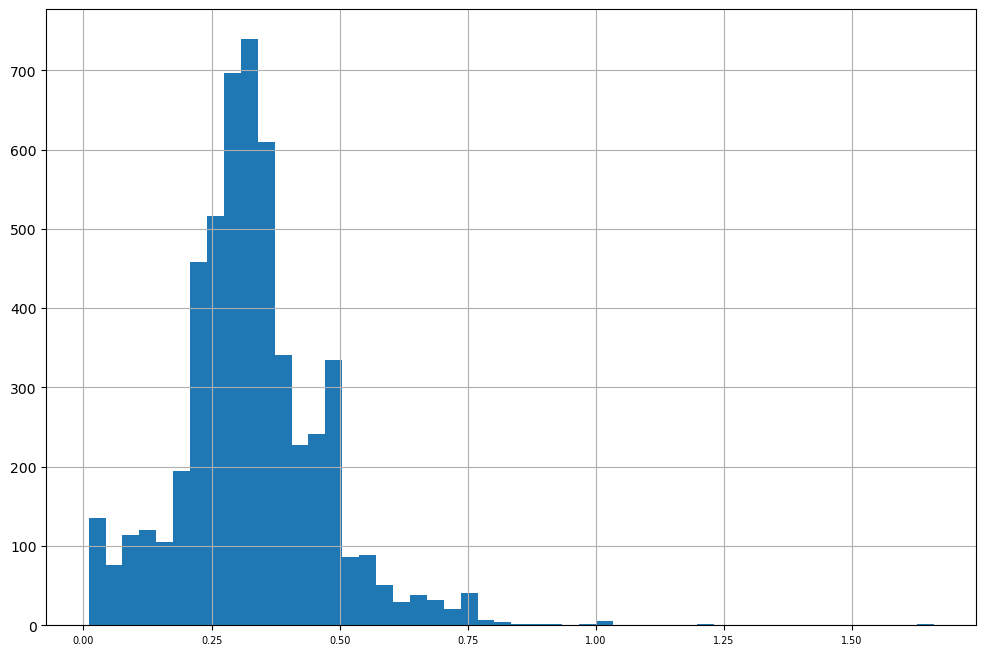

In [153]:
# Your code goes here
wine_quality_df['citric_acid'].value_counts().sort_index() # It has zeros
wine_quality_df['free_sulfur_dioxide'].value_counts().sort_index() # It doesn't have zeros
wine_quality_df['citric_acid'] = wine_quality_df['citric_acid'].replace(0, np.nan)
wine_quality_df.info()

# Check drop_duplicates() function from pandas
wine_quality_df = wine_quality_df.drop_duplicates()

missing_values_after_replace = wine_quality_df['citric_acid'].isnull().sum()
print("\nMissing values after replacing 0s in citric_acid:")
print(missing_values_after_replace)

# Justification: Using the median is often preferred over the mean for imputation when the data might have outliers, as the median is less affected by extreme values.
median_value = wine_quality_df['citric_acid'].median()
wine_quality_df['citric_acid'] = wine_quality_df['citric_acid'].fillna(median_value)
wine_quality_df['citric_acid'].hist(bins=50, figsize=(12, 8))

### 3.3. Feature Engineering

- Create new features (if you consider they might be useful) given the existing ones.
- Encode categorical variables (if any)
- Transform numerical features so that they have similar scales

## 4. Training

### 4.1. Define Features and Target

- Define X (features) and y (target)

In [172]:
y_train = train_set["quality"]
X_train = train_set.drop("quality", axis=1)

y_test = test_set["quality"]
X_test = test_set.drop("quality", axis=1)

### 4.2. Train your model and evaluate it using Cross-validation

- Import the models that you want to use from sklearn.
- Choose some metrics that will let you know how the models are performing.
- Use cross-validation to validate them and compare their performances. Choose the best one.
- (Optional) Perform a hyperparameter search to improve the training of the model.

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Escalador
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=10000, tol=0.0001)

# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# Doing scaling it converges!
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(f"Modelo: {"Logistic Regression"}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Modelo: Logistic Regression
Accuracy: 0.5469924812030075
F1 Score: 0.5187484806712053


In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# Modelos y si requieren normalización
models = {
    "Logistic Regression": (LogisticRegression(max_iter=10000, tol=0.0001), True),
    "Random Forest": (RandomForestClassifier(), False),
    "SVM": (SVC(probability=True), True),
    "KNN": (KNeighborsClassifier(), True),
    "Naive Bayes": (GaussianNB(), True),  # opcional pero recomendable
    "Decision Tree": (DecisionTreeClassifier(), False)
}

# Escalador
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar y evaluar
for name, (model, needs_scaling) in models.items():
    print(f"Modelo: {name}")
    if needs_scaling:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 30)

Modelo: Logistic Regression
  Accuracy: 0.5470
  F1 Score: 0.5187
------------------------------
Modelo: Random Forest
  Accuracy: 0.5789
  F1 Score: 0.5595
------------------------------
Modelo: SVM
  Accuracy: 0.5780
  F1 Score: 0.5434
------------------------------
Modelo: KNN
  Accuracy: 0.5376
  F1 Score: 0.5251
------------------------------
Modelo: Naive Bayes
  Accuracy: 0.4784
  F1 Score: 0.4747
------------------------------
Modelo: Decision Tree
  Accuracy: 0.4539
  F1 Score: 0.4567
------------------------------


In [195]:
print("🎯 Accuracy sobre los MISMOS datos de ENTRENAMIENTO:\n")
for name, (model, needs_scaling) in models.items():
    if needs_scaling:
        y_train_pred = model.predict(X_train_scaled)
    else:
        y_train_pred = model.predict(X_train)

    acc = accuracy_score(y_train, y_train_pred)
    print(f"{name}: {acc:.4f}")

🎯 Accuracy sobre los MISMOS datos de ENTRENAMIENTO:

Logistic Regression: 0.5522
Random Forest: 1.0000
SVM: 0.5971
KNN: 0.6697
Naive Bayes: 0.4577
Decision Tree: 1.0000


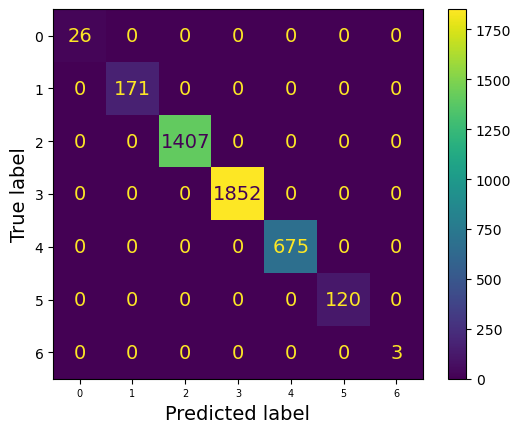

In [197]:
# See confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat_diabetes = confusion_matrix(y_train, y_train_pred)
display_labels = ["","","",""]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_diabetes)
disp.plot()

In [224]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# Modelos
from sklearn.linear_model import (
    LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier
)
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
    HistGradientBoostingClassifier, BaggingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📦 Modelos básicos
basic_models = {
    "Logistic Regression": (LogisticRegression(max_iter=10000, tol=0.0001), True),
    "Random Forest": (RandomForestClassifier(), False),
    "SVC": (SVC(probability=True), True),
    "KNN": (KNeighborsClassifier(), True),
    "Naive Bayes": (GaussianNB(), True),
    "Decision Tree": (DecisionTreeClassifier(), False)
}

# 🚀 Modelos avanzados
advanced_models = {
    "Gradient Boosting": (GradientBoostingClassifier(), False),
    "HistGradient Boosting": (HistGradientBoostingClassifier(), False),
    "AdaBoost": (AdaBoostClassifier(), False),
    "Bagging": (BaggingClassifier(), False),
    "Linear Discriminant Analysis": (LinearDiscriminantAnalysis(), True),
    "Quadratic Discriminant Analysis": (QuadraticDiscriminantAnalysis(), True),
    "MLP (Neural Network)": (MLPClassifier(max_iter=1000), True),
    "Passive Aggressive": (PassiveAggressiveClassifier(max_iter=1000), True),
    "Ridge Classifier": (RidgeClassifier(), True)
}

# 🔗 Todos los modelos
all_models = {**basic_models, **advanced_models}

# 📊 Resultados
results = []

for name, (model, needs_scaling) in all_models.items():
    if needs_scaling:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    overfit_gap = train_acc - test_acc
    
    results.append({
        "Modelo": name,
        "Accuracy Train": train_acc,
        "Accuracy Test": test_acc,
        "Overfitting Gap": overfit_gap,
        "F1 Score Test": f1
    })

# 📋 Tabla ordenada por F1-score
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="F1 Score Test", ascending=False)

# Mostrar
print(df_results.to_string(index=False, float_format="%.4f"))


C:\Users\rpieres\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\rpieres\AppData\Roaming\Python\Python312\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


                         Modelo  Accuracy Train  Accuracy Test  Overfitting Gap  F1 Score Test
                  Random Forest          1.0000         0.5865           0.4135         0.5688
          HistGradient Boosting          0.9817         0.5742           0.4074         0.5595
              Gradient Boosting          0.7033         0.5705           0.1328         0.5508
                            SVC          0.5971         0.5780           0.0191         0.5434
           MLP (Neural Network)          0.6643         0.5545           0.1098         0.5393
                            KNN          0.6697         0.5376           0.1321         0.5251
                        Bagging          0.9781         0.5395           0.4387         0.5249
            Logistic Regression          0.5522         0.5470           0.0052         0.5187
   Linear Discriminant Analysis          0.5477         0.5301           0.0176         0.5100
                    Naive Bayes          0.4577   

In [220]:
from sklearn.model_selection import GridSearchCV

# Definimos el modelo
model = LogisticRegression(solver='liblinear', max_iter=10000)

# Definimos el grid de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Creamos el GridSearch con validación cruzada de 5 particiones
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy score:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best cross-validated accuracy score: 0.547719793135872


In [222]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Creamos un pipeline: escalado + SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Definimos los parámetros a ajustar (usa 'svm__' por el pipeline)
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto'],
    'svm__degree': [2, 3]  # solo afecta si kernel='poly'
}

# GridSearch con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)  # cv = 5?
grid_search.fit(X_train_scaled, y_train)

# Resultados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

print(f"Mejor F1 Score en validación: {grid_search.best_score_:.4f}")

# Usamos el mejor modelo para evaluar en test
from sklearn.metrics import accuracy_score, f1_score

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Accuracy en test: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score en test: {f1_score(y_test, y_pred, average='macro'):.4f}")


C:\Users\rpieres\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Mejores parámetros encontrados:
{'svm__C': 10, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Mejor F1 Score en validación: 0.2519


C:\Users\rpieres\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Accuracy en test: 0.3233
F1 Score en test: 0.0698


In [226]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score

# Pipeline: escalado + MLP
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=1000, random_state=42))
])

# Hiperparámetros a ajustar
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate_init': [0.001, 0.01]
}

# GridSearch con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)  # cv = 5?
grid_search.fit(X_train_scaled, y_train)

# Resultados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

print(f"Mejor F1 Score en validación cruzada: {grid_search.best_score_:.4f}")

# Evaluamos en el set de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Accuracy en test: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score en test: {f1_score(y_test, y_pred, average='macro'):.4f}")


C:\Users\rpieres\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Mejores parámetros encontrados:
{'mlp__activation': 'relu', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__learning_rate_init': 0.001}
Mejor F1 Score en validación cruzada: 0.2858
Accuracy en test: 0.0216
F1 Score en test: 0.0185


C:\Users\rpieres\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\rpieres\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## 5. Evaluate on test set

- Clean and do feature engineering process on test set.
- See how the model performs on the test set.

## 6. Conclusions and future work